In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
#Physics parameters
g = 9.81
b = 0.1    # Gamma/m  Gamma is the viscosity and m the mass 

In [23]:
h = 0.01
t = np.arange(0,3+h,h)

In [53]:
def System(r,t,b):
    
    x, y, vx, vy = r
    
    dxdt = vx
    dydt = vy
    dvxdt = 0. - b*vx # velocidad del sistema menos la friccion (0 por ahora)
    dvydt = - g - b*vy
    
    return [dxdt, dydt, dvxdt, dvydt]

In [46]:
def Integrator2(f,r0,t,b):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    vx[0] = r0[2]
    vy[0] = r0[3]
    
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    
    # Las pendientes instantaneas
    R = np.zeros(4)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1],vx[i-1],vy[i-1]])
        
        K1 = f(R,t[i-1],b)
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1],vx[i-1]+h*K1[2],vy[i-1]+h*K1[3]])
        
        K2 = f(R,t[i-1]+h,b)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[2]+K2[2])
        vy[i] = vy[i-1] + 0.5*h*(K1[3]+K2[3])
        
    return x,y,vx,vy

In [47]:
theta = 30*np.pi/180
r0 = [0.,10,20*np.cos(theta),20*np.sin(theta)]

In [54]:
x,y,vx,vy = Integrator2(System,r0,t,2.)

0.01


In [1]:
r = integrate.odeint(System, r0, t, args=(2.,))

NameError: name 'integrate' is not defined

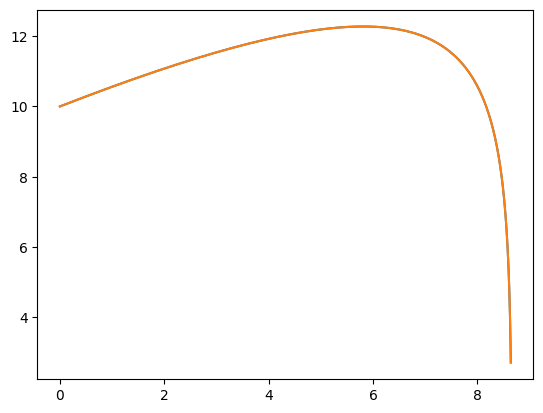

In [57]:
plt.plot(x,y)
plt.plot(r[:,0],r[:,1])

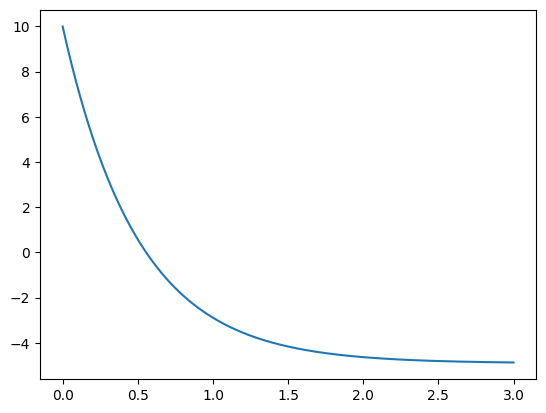

In [58]:
plt.plot(t,vy)

In [92]:
def Integrator3(f,r0,t,b):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    vx[0] = r0[2]
    vy[0] = r0[3]
    
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    
    # Las pendientes instantaneas
    R = np.zeros(4)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1],vx[i-1],vy[i-1]])
        
        K1 = f(R,t[i-1],b)
        
        # Modificacion
        
        R = np.array([x[i-1]+h*K1[0]/2, y[i-1]+h*K1[1]/2, vx[i-1]+h*K1[2]/2, vy[i-1]+h*K1[3]/2])
        
        K2 = f(R,t[i-1]+h/2,b)
        
        
        R = np.array([x[i-1]+h*K1[0]+h*K2[0], y[i-1]+h*K1[1]+h*K2[1], vx[i-1]+h*K1[2]+h*K2[2], vy[i-1]+h*K1[3]+h*2*K1[3]])
        
        K3 = f(R,t[i-1]+2*h,b)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0]+K3[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1]+K3[1])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[2]+K2[2]+K3[2])
        vy[i] = vy[i-1] + 0.5*h*(K1[3]+K2[3]+K3[3])
        
    return x,y,vx,vy

0.01


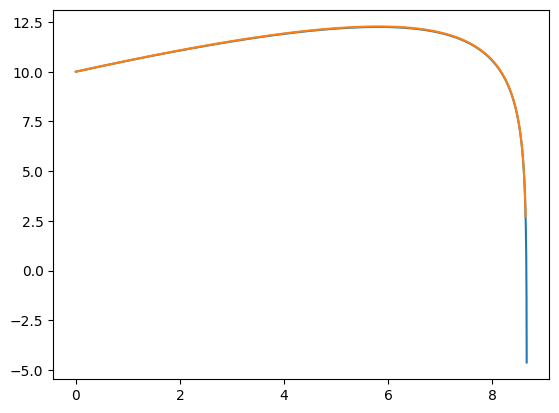

In [93]:
x3,y3,vx3,vy3 = Integrator3(System,r0,t,2.)

#plt.plot(x,y)
plt.plot(x3,y3)

plt.plot(r[:,0],r[:,1])